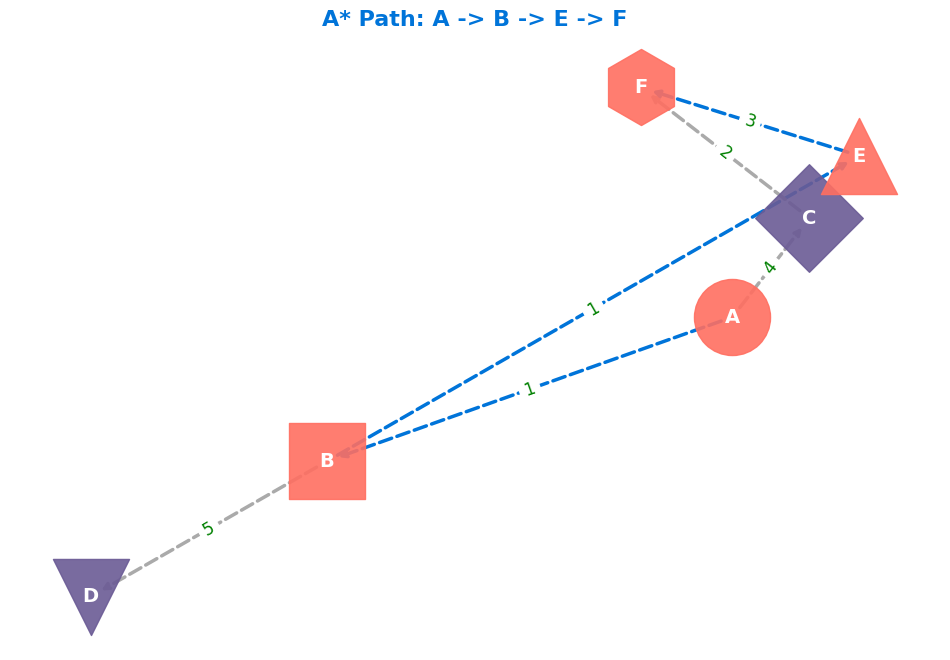

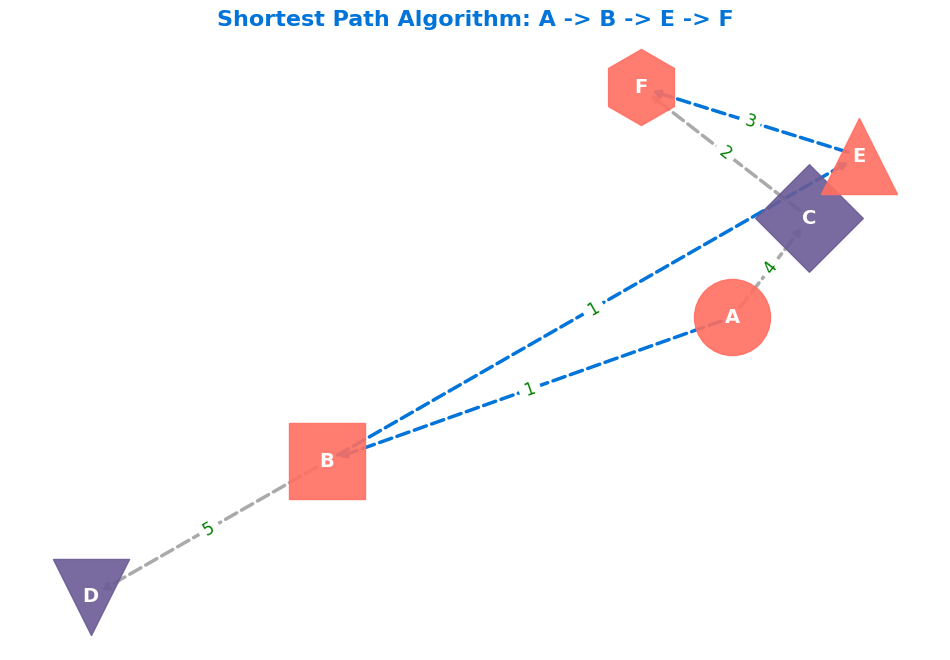

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Graph definition with cost
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'D': 5, 'E': 1},
    'C': {'F': 2},
    'D': {},
    'E': {'F': 3},
    'F': {}
}

# Heuristic values for A* (e.g., straight-line distance to goal)
heuristic = {
    'A': 6,
    'B': 2,
    'C': 4,
    'D': 1,
    'E': 3,
    'F': 0  # Goal node
}

# A* Algorithm with heuristic
def a_star(graph, start, goal, heuristic):
    pq = [(0 + heuristic[start], start, [])]  # Priority queue with (f_score, node, path)
    visited = set()

    while pq:
        (f_score, current, path) = heapq.heappop(pq)

        if current in visited:
            continue

        path = path + [current]
        visited.add(current)

        if current == goal:
            return path

        for neighbor, cost in graph[current].items():
            if neighbor not in visited:
                g_score = sum(graph[node][neighbor] for node, neighbor in zip(path, path[1:] + [neighbor])) + cost
                heapq.heappush(pq, (g_score + heuristic[neighbor], neighbor, path))

    return None

# Dijkstra's Algorithm (without heuristic)
def dijkstra(graph, start, goal):
    pq = [(0, start, [])]  # Priority queue with (cost, node, path)
    visited = set()

    while pq:
        (cost, current, path) = heapq.heappop(pq)

        if current in visited:
            continue

        path = path + [current]
        visited.add(current)

        if current == goal:
            return path

        for neighbor, edge_cost in graph[current].items():
            if neighbor not in visited:
                heapq.heappush(pq, (cost + edge_cost, neighbor, path))

    return None

# Enhanced Visualization Function
def visualize_graph(graph, path, title, costs):
    G = nx.DiGraph()

    for node in graph:
        for neighbor, cost in graph[node].items():
            G.add_edge(node, neighbor, weight=cost)

    pos = nx.spring_layout(G, seed=42)  # Set seed for consistent layout
    plt.figure(figsize=(12, 8))

    # Draw nodes with different shapes and colors
    node_colors = ['#FF6F61' if node in path else '#6B5B95' for node in G.nodes()]
    node_shapes = {'A': 'o', 'B': 's', 'C': 'D', 'D': 'v', 'E': '^', 'F': 'h'}  # Custom shapes

    # Draw nodes individually to handle custom shapes and colors
    for node, shape in node_shapes.items():
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_shape=shape, node_color=[node_colors[list(G.nodes()).index(node)]],
                               node_size=3000, alpha=0.9)

    nx.draw_networkx_labels(G, pos, font_size=14, font_color='white', font_weight='bold')

    # Highlight the path with different edge colors
    edge_colors = ['#0074D9' if (u, v) in zip(path, path[1:]) else '#AAAAAA' for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2.5, style='dashed')

    # Draw edge labels (costs)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green', font_size=12)

    plt.title(title, fontsize=16, fontweight='bold', color='#0074D9')
    plt.axis('off')
    plt.show()

# Execute A* and Dijkstra's Algorithms
start_node = 'A'
goal_node = 'F'

a_star_path = a_star(graph, start_node, goal_node, heuristic)
dijkstra_path = dijkstra(graph, start_node, goal_node)

# Visualize A* and Dijkstra's paths with enhanced design
visualize_graph(graph, a_star_path, "A* Path: " + " -> ".join(a_star_path), heuristic)
visualize_graph(graph, dijkstra_path, "Shortest Path Algorithm: " + " -> ".join(dijkstra_path), heuristic)
